# Stock Prediction of GOLD - LSTM & ARIMA Model

## OPTION 2

## Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from sklearn.metrics import mean_squared_error

## Loading data

In [38]:
data = pd.read_csv('D:\\AI CLASS\\6TH SEM\\FINANCIAL TIME SERIES ANALYSIS\\ASSIGNMENT\\ASS 2\\data4.csv')
d1 = pd.read_csv('D:\\AI CLASS\\6TH SEM\\FINANCIAL TIME SERIES ANALYSIS\\ASSIGNMENT\\ASS 2\\data1.csv')
d2 = pd.read_csv('D:\\AI CLASS\\6TH SEM\\FINANCIAL TIME SERIES ANALYSIS\\ASSIGNMENT\\ASS 2\\data2.csv')
d3 = pd.read_csv('D:\\AI CLASS\\6TH SEM\\FINANCIAL TIME SERIES ANALYSIS\\ASSIGNMENT\\ASS 2\\data3.csv').drop(0)

In [39]:
data = data.append([d1,d2, d3], ignore_index=True)

In [40]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-2019,10881.70,10923.60,10807.10,10910.10,159404542,8688.26
1,02-Jan-2019,10868.85,10895.35,10735.05,10792.50,309665939,15352.25
2,03-Jan-2019,10796.80,10814.05,10661.25,10672.25,286241745,15030.45
3,04-Jan-2019,10699.70,10741.05,10628.65,10727.35,296596655,14516.74
4,07-Jan-2019,10804.85,10835.95,10750.15,10771.80,269371080,12731.29


In [41]:
data.shape

(744, 7)

In [42]:
# format date to datetime object
data.Date = pd.DataFrame([datetime.strptime(i, '%d-%b-%Y') for i in data.Date.values])

In [43]:
y = data['Close'].values

In [45]:
y1 = data[data['Date']<=datetime.strptime('31-Dec-2020', '%d-%b-%Y')]['Close'].values
y2 = data[data['Date']>datetime.strptime('31-Dec-2020', '%d-%b-%Y')]['Close'].values
y = y1.copy()

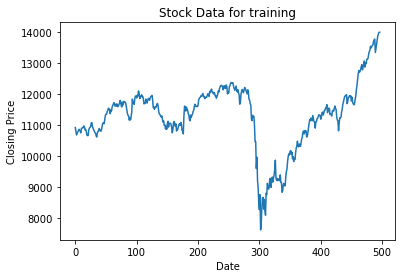

In [47]:
plt.plot(y)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Data for training')
plt.show()

## ACF and PACF test

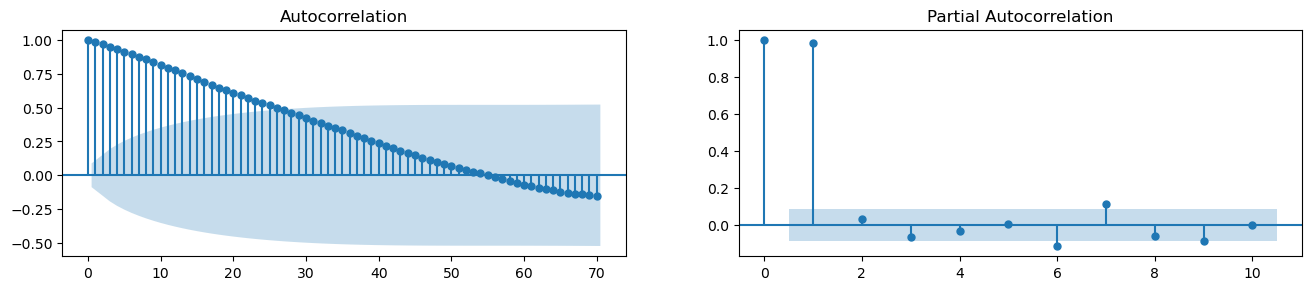

In [48]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(y, lags=70, ax=axes[0])
plot_pacf(y, lags=10, ax=axes[1])
plt.show()

## Pre-processing for LSTM Model

In [49]:
# Scale the data
yy =y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(yy)

In [50]:
# Create the scaled training data set
y1 = scaled_data[0:int(len(y)), :]
# Create the training data set 
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(y1)):
    x_train.append(y1[i-60:i])
    y_train.append(y1[i])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# x_train.shape


[array([[0.51789161],
       [0.499435  ],
       [0.48056249],
       [0.4892101 ],
       [0.49618626],
       [0.50094951],
       [0.50926754],
       [0.50400207],
       [0.49981951],
       [0.49081878],
       [0.51423482],
       [0.51478412],
       [0.51712259],
       [0.51739724],
       [0.52601347],
       [0.51987696],
       [0.50555582],
       [0.50842789],
       [0.49755952],
       [0.47888319],
       [0.47741576],
       [0.47735298],
       [0.5054695 ],
       [0.51530989],
       [0.51822904],
       [0.52169751],
       [0.54180203],
       [0.54289279],
       [0.52314924],
       [0.51454871],
       [0.50554012],
       [0.49961549],
       [0.49214495],
       [0.48874712],
       [0.47565014],
       [0.46990599],
       [0.49048135],
       [0.4990191 ],
       [0.4993016 ],
       [0.51318329],
       [0.5061522 ],
       [0.50165576],
       [0.499435  ],
       [0.51057802],
       [0.53003123],
       [0.54031891],
       [0.54113502],
       [0.53

# LSTM Model

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
437/437 [==============================] - 8s 15ms/step - loss: 0.0174
Epoch 2/100
437/437 [==============================] - 6s 14ms/step - loss: 0.0032
Epoch 3/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0031
Epoch 4/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0022
Epoch 5/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0020
Epoch 6/100
437/437 [==============================] - 7s 16ms/step - loss: 0.0020
Epoch 7/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0016
Epoch 8/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0016
Epoch 9/100
437/437 [==============================] - 7s 16ms/step - loss: 0.0014
Epoch 10/100
437/437 [==============================] - 7s 15ms/step - loss: 0.0012: 0s - l
Epoch 11/100
437/437 [==============================] - 7s 16ms/step - loss: 0.0011
Epoch 12/100
437/437 [==============================] - 7s 16ms/step - loss: 

## Prediction & RMSE test - LSTM Model

In [52]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[len(y)-100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = yy[len(x_train):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
p_mean =np.mean(predictions)
ytest_mean = np.mean(y_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(((p_mean - ytest_mean) ** 2))
print('Test RMSE for LSTM Model: %.3f' % rmse)

Test RMSE for LSTM Model: 282.701


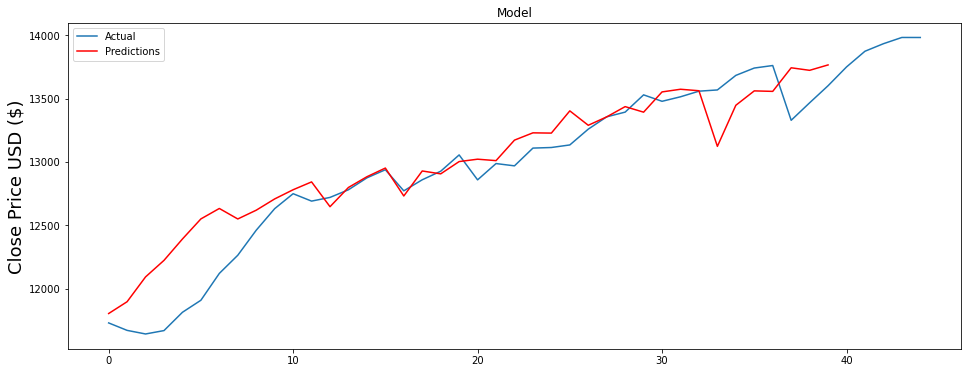

In [73]:
# Plot the data
train = y[len(x_train)+15 :]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(predictions, color="red")
plt.legend(['Actual', 'Predictions'])
plt.show()

### The Prediction or forecast of the time series done using LSTM Model is not so perfect as the Root Mean Square error is some-what high. So, I have used some alternatives of this model such as, ARIMA Model  

# ARIMA Model

In [19]:
# Using the another model to increase the Prediction Accuracy

# ARIMA Model

y11 = y.tolist()
predictions = []
for t in range(len(y2)):
    model = ARIMA(y11, order=(1,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    y11.append(y2[t])
    print('predicted=%f, expected=%f' % (yhat, y2[t]))

predicted=14009.638287, expected=14018.500000
predicted=14034.302686, expected=14132.900000
predicted=14203.289321, expected=14199.500000
predicted=14293.193945, expected=14146.250000
predicted=14160.900895, expected=14137.350000
predicted=14103.327453, expected=14347.250000
predicted=14433.306370, expected=14484.750000
predicted=14663.198714, expected=14563.450000
predicted=14675.390880, expected=14564.850000
predicted=14609.930608, expected=14595.600000
predicted=14609.765527, expected=14433.700000
predicted=14380.698154, expected=14281.300000
predicted=14123.537017, expected=14521.150000
predicted=14539.658890, expected=14644.700000
predicted=14833.690217, expected=14590.350000
predicted=14635.900807, expected=14371.900000
predicted=14245.295141, expected=14238.900000
predicted=14058.076051, expected=13967.500000
predicted=13773.602851, expected=13817.550000
predicted=13599.557535, expected=13634.600000
predicted=13470.133500, expected=14281.200000
predicted=14462.655877, expected=1

## Prediction & RMSE test- ARIMA Model

Test RMSE for ARIMA Model: 196.384


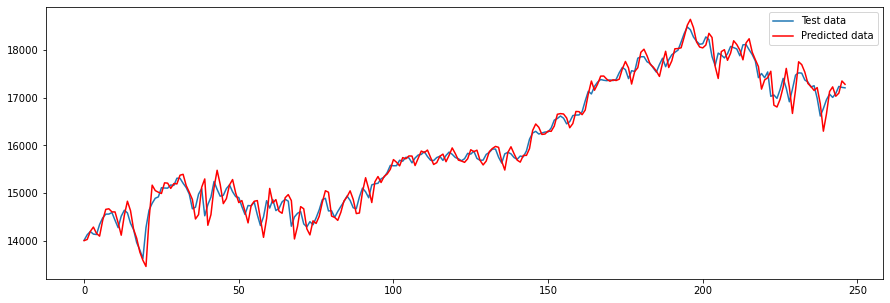

In [20]:
rmse = np.sqrt(mean_squared_error(y2, predictions))
print('Test RMSE for ARIMA Model: %.3f' % rmse)

fig = plt.figure(figsize=(15,5))
plt.plot(y2)
plt.plot(predictions, color='red')
plt.legend(['Test data', 'Predicted data'])
plt.show()